Yilei Dong | ID: 1466802171 | DSCI 352

Using hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP) of a combined cycle power plant at full load from 2006-2011 with linear regressions. 

##### 1. (a) Download the Combined Cycle Power Plant data from: https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant.

In [1]:
# Import libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import xlrd 
import csv 
import statsmodels.api as sm 
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.regression import linear_model
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from statsmodels.stats.outliers_influence import OLSInfluence

# Display dataframe
df = pd.read_excel("Folds5x2_pp.xlsx")
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


##### (b) Exploring the data: 
i. How many rows are in this data set? How many columns? What do the rows and columns represent? 

In [2]:
print(df.shape)

(9568, 5)


There are 9,568 rows and 5 columns in this dataset. The rows represent all the instances collected throughout the 6 years when the combined cycle power plant was set to work with a full load. The columns represent hourly ambient variables Temperature (AT), Exhaust Vacuum (V), Ambient Pressure (AP), Relative Humidity (RH), and net hourly electrical Energy Output (PE) of the plant, where AT, V, AP, and RH are used to predict PE. 

ii. Make pairwise scatterplots of all the variables in the data set including the
predictors (independent variables) with the dependent variable. Describe
your findings. 

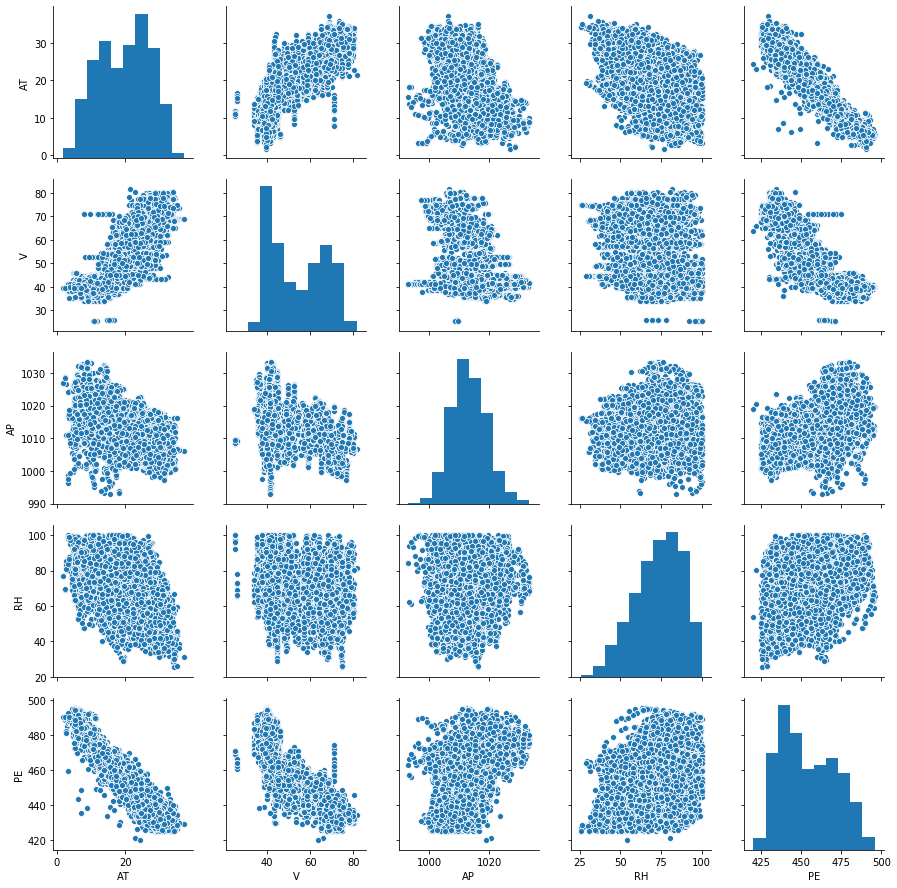

In [3]:
sns.pairplot(df)

There appears to be a clear positive correlation between temperature (AT) vs. exhaust vacuum (V). There appears to be clear negative correlations between temperature (AT) vs. energy output (PE) and exhaust vacuum (V) vs. energy output (PE). 

iii. What are the mean, the median, range, first and third quartiles, and interquartile ranges of each of the variables in the dataset? Summarize them
in a table. 

In [4]:
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


##### (c) For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions. Are there any outliers that you would like to remove from your data for each of these regression tasks? 


Temperature & Energy Output: 

In [5]:
train_X = df['AT'].copy()
train_X = sm.add_constant(train_X, prepend=False) # takes care of beta knot

C:\Users\yilei\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [6]:
# Linear Regression for Temperature 
slr = sm.OLS(df['PE'], train_X).fit()
print(slr.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Fri, 26 Feb 2021   Prob (F-statistic):               0.00
Time:                        23:10:15   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AT            -2.1713      0.007   -291.715      0.0

Predicted linear regression line for 'AT'


<function matplotlib.pyplot.show(*args, **kw)>

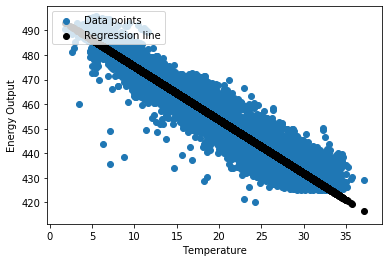

In [7]:
slr_pred = slr.predict(train_X)
print(f"Predicted linear regression line for 'AT'")
plt.scatter(df['AT'], df['PE'], label='Data points')
plt.scatter(df['AT'], slr_pred, color='k', label='Regression line')
plt.ylabel('Energy Output')
plt.xlabel('Temperature')
plt.legend(loc='upper left')
plt.show

Predicted linear regression line for 'AT'


<function matplotlib.pyplot.show(*args, **kw)>

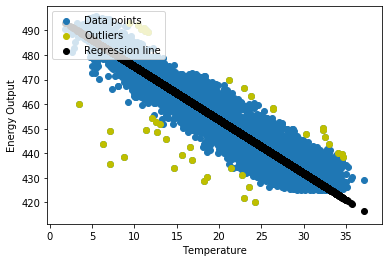

In [8]:
# Plot with outliers for temperature vs. energy output 
X1StutRes = OLSInfluence(slr).get_resid_studentized_external()
outliers1 = []
for index, value in X1StutRes.items(): 
    if value > 3 or value < -3: 
        outliers1.append(index)
outliers1DF = df[df.index.isin(outliers1)]
print(f"Predicted linear regression line for 'AT'")
plt.scatter(df['AT'], df['PE'], label='Data points')
plt.scatter(outliers1DF['AT'], outliers1DF['PE'], color='y', label='Outliers')
plt.scatter(df['AT'], slr_pred, color='k', label='Regression line')
plt.ylabel('Energy Output')
plt.xlabel('Temperature')
plt.legend(loc='upper left')
plt.show

Exhaust Vacuum & Energy Output: 

In [9]:
train_X2 = df['V'].copy()
train_X2 = sm.add_constant(train_X2, prepend=False) 

In [10]:
# Linear Regression for Exhaust Vacuum
slr2 = sm.OLS(df['PE'], train_X2).fit()
print(slr2.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Fri, 26 Feb 2021   Prob (F-statistic):               0.00
Time:                        23:10:18   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
V             -1.1681      0.007   -172.402      0.0

Predicted linear regression line for 'V'


<function matplotlib.pyplot.show(*args, **kw)>

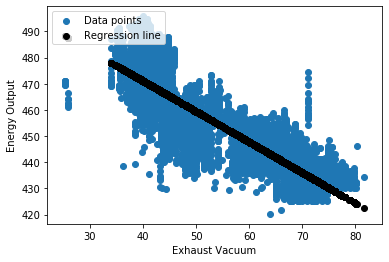

In [11]:
slr_pred2 = slr2.predict(train_X2)
print(f"Predicted linear regression line for 'V'")
plt.scatter(df['V'], df['PE'], label='Data points')
plt.scatter(df['V'], slr_pred2, color='k', label='Regression line')
plt.ylabel('Energy Output')
plt.xlabel('Exhaust Vacuum')
plt.legend(loc='upper left')
plt.show

Predicted linear regression line for 'V'


<function matplotlib.pyplot.show(*args, **kw)>

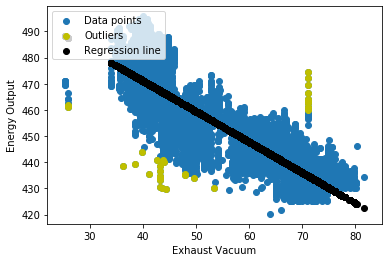

In [12]:
# Plot with outliers for exhaust vacuum vs. energy output 
X2StutRes = OLSInfluence(slr2).get_resid_studentized_external()
outliers2 = []
for index, value in X2StutRes.items(): 
    if value > 3 or value < -3: 
        outliers2.append(index)
outliers2DF = df[df.index.isin(outliers2)]
print(f"Predicted linear regression line for 'V'")
plt.scatter(df['V'], df['PE'], label='Data points')
plt.scatter(outliers2DF['V'], outliers2DF['PE'], color='y', label='Outliers')
plt.scatter(df['V'], slr_pred2, color='k', label='Regression line')
plt.ylabel('Energy Output')
plt.xlabel('Exhaust Vacuum')
plt.legend(loc='upper left')
plt.show

Ambient Pressue & Energy Output: 

In [13]:
train_X3 = df['AP'].copy()
train_X3 = sm.add_constant(train_X3, prepend=False)

In [14]:
# Linear Regression for Ambient Pressure 
slr3 = sm.OLS(df['PE'], train_X3).fit()
print(slr3.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Fri, 26 Feb 2021   Prob (F-statistic):               0.00
Time:                        23:10:21   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AP             1.4899      0.025     59.296      0.0

Predicted linear regression line for 'AP'


<function matplotlib.pyplot.show(*args, **kw)>

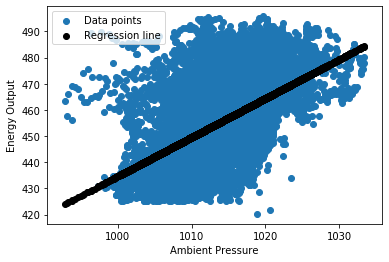

In [15]:
slr_pred3 = slr3.predict(train_X3)
print(f"Predicted linear regression line for 'AP'")
plt.scatter(df['AP'], df['PE'], label='Data points')
plt.scatter(df['AP'], slr_pred3, color='k', label='Regression line')
plt.ylabel('Energy Output')
plt.xlabel('Ambient Pressure')
plt.legend(loc='upper left')
plt.show

Predicted linear regression line for 'AP'


<function matplotlib.pyplot.show(*args, **kw)>

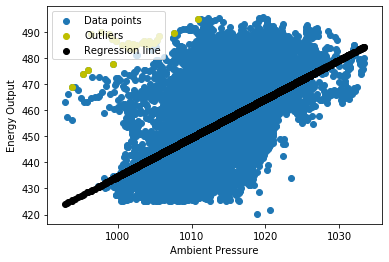

In [16]:
# Plot with outliers for ambient pressure vs. energy output 
X3StutRes = OLSInfluence(slr3).get_resid_studentized_external()
outliers3 = []
for index, value in X3StutRes.items(): 
    if value > 3 or value < -3: 
        outliers3.append(index)
outliers3DF = df[df.index.isin(outliers3)]
print(f"Predicted linear regression line for 'AP'")
plt.scatter(df['AP'], df['PE'], label='Data points')
plt.scatter(outliers3DF['AP'], outliers3DF['PE'], color='y', label='Outliers')
plt.scatter(df['AP'], slr_pred3, color='k', label='Regression line')
plt.ylabel('Energy Output')
plt.xlabel('Ambient Pressure')
plt.legend(loc='upper left')
plt.show

Relative Humidity & Energy Output: 

In [17]:
train_X4 = df['RH'].copy()
train_X4 = sm.add_constant(train_X4, prepend=False)

In [18]:
# Linear Regression for Relative Humidity 
slr4 = sm.OLS(df['PE'], train_X4).fit()
print(slr4.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Fri, 26 Feb 2021   Prob (F-statistic):               0.00
Time:                        23:10:23   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RH             0.4557      0.011     41.399      0.0

Predicted linear regression line for 'RH'


<function matplotlib.pyplot.show(*args, **kw)>

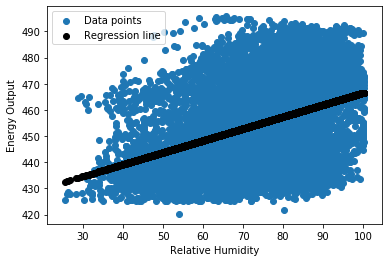

In [19]:
slr_pred4 = slr4.predict(train_X4)
print(f"Predicted linear regression line for 'RH'")
plt.scatter(df['RH'], df['PE'], label='Data points')
plt.scatter(df['RH'], slr_pred4, color='k', label='Regression line')
plt.ylabel('Energy Output')
plt.xlabel('Relative Humidity')
plt.legend(loc='upper left')
plt.show

Predicted linear regression line for 'RH'


<function matplotlib.pyplot.show(*args, **kw)>

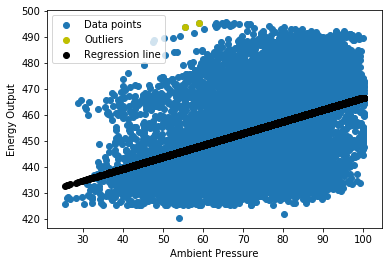

In [20]:
# Plot with outliers for relative humidity vs. energy output 
X4StutRes = OLSInfluence(slr4).get_resid_studentized_external()
outliers4 = []
for index, value in X4StutRes.items(): 
    if value > 3 or value < -3: 
        outliers4.append(index)
outliers4DF = df[df.index.isin(outliers4)]
print(f"Predicted linear regression line for 'RH'")
plt.scatter(df['RH'], df['PE'], label='Data points')
plt.scatter(outliers4DF['RH'], outliers4DF['PE'], color='y', label='Outliers')
plt.scatter(df['RH'], slr_pred4, color='k', label='Regression line')
plt.ylabel('Energy Output')
plt.xlabel('Ambient Pressure')
plt.legend(loc='upper left')
plt.show

All of the models have a statistically significant association between the predictor and the response because for a predicting variables, the p < 0.05, in which p= = 0.00 for all of them. 

##### (d)  Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis H0 : βj = 0? 


In [21]:
multipleTrainX = df[['AT', 'V', 'AP', 'RH']].copy()
multipleTrainX = sm.add_constant(multipleTrainX, prepend=False)

In [22]:
slrMult = sm.OLS(df['PE'], multipleTrainX).fit()
print(slrMult.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Fri, 26 Feb 2021   Prob (F-statistic):               0.00
Time:                        23:10:25   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AT            -1.9775      0.015   -129.342      0.0

We can reject the null hypothesis for AT, V, AP, and RH, since all of them have a significance of p < 0.05. For all of them, p = 0.000. 

##### (e) How do your results from 1c compare to your results from 1d? Create a plot displaying the univariate regression coefficients from 1c on the x-axis, and the multiple regression coefficients from 1d on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis. 


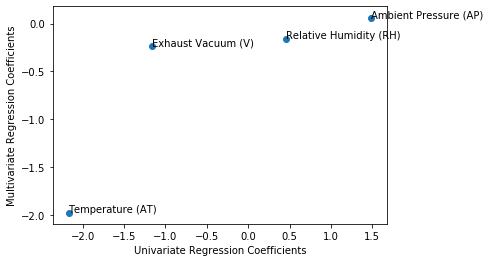

In [23]:
univar = [-2.1713, -1.1681, 1.4899, 0.4557]
multivar = [-1.9775, -0.2339, 0.0621, -0.1581]
plt.scatter(univar, multivar)
plt.annotate('Temperature (AT)', xy=(-2.173,-1.9775))
plt.annotate('Exhaust Vacuum (V)', xy=(-1.1681,-0.2339))
plt.annotate('Ambient Pressure (AP)', xy=(1.4899,0.0621))
plt.annotate('Relative Humidity (RH)', xy=(0.4557,-0.1581))
plt.ylabel('Multivariate Regression Coefficients')
plt.xlabel('Univariate Regression Coefficients')
plt.show()

##### (f) Is there evidence of nonlinear association between any of the predictors and the response? To answer this question, for each predictor X, fit a model of the form? 

Temperature & Energy Output: 

In [24]:
trainX = df['AT'].copy()
trainX = trainX.to_numpy().reshape(-1, 1)
poly_trainX = PolynomialFeatures(degree=2).fit_transform(trainX)

In [25]:
poly_slr = sm.OLS(df['PE'], poly_trainX).fit()
print(poly_slr.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                 4.674e+04
Date:                Fri, 26 Feb 2021   Prob (F-statistic):               0.00
Time:                        23:10:26   Log-Likelihood:                -29350.
No. Observations:                9568   AIC:                         5.871e+04
Df Residuals:                    9565   BIC:                         5.873e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        505.9504      0.341   1484.226      0.0

Exhaust Vacuum & Energy Output: 

In [26]:
trainX2 = df['V'].copy()
trainX2 = trainX2.to_numpy().reshape(-1, 1)
poly_trainX2 = PolynomialFeatures(degree=2).fit_transform(trainX2)
poly_slr2 = sm.OLS(df['PE'], poly_trainX2).fit()
print(poly_slr2.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                 1.646e+04
Date:                Fri, 26 Feb 2021   Prob (F-statistic):               0.00
Time:                        23:10:26   Log-Likelihood:                -33588.
No. Observations:                9568   AIC:                         6.718e+04
Df Residuals:                    9565   BIC:                         6.720e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        576.0875      2.118    271.972      0.0

Ambient Pressure & Energy Output: 

In [27]:
trainX3 = df['AP'].copy()
trainX3 = trainX3.to_numpy().reshape(-1, 1)
poly_trainX3 = PolynomialFeatures(degree=2).fit_transform(trainX3)
poly_slr3 = sm.OLS(df['PE'], poly_trainX3).fit()
print(poly_slr3.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     1815.
Date:                Fri, 26 Feb 2021   Prob (F-statistic):               0.00
Time:                        23:10:26   Log-Likelihood:                -39183.
No. Observations:                9568   AIC:                         7.837e+04
Df Residuals:                    9565   BIC:                         7.839e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.676e+04   3045.711      8.788      0.0

Relative Humidity & Energy Output: 

In [28]:
trainX4 = df['RH'].copy()
trainX4 = trainX4.to_numpy().reshape(-1, 1)
poly_trainX4 = PolynomialFeatures(degree=2).fit_transform(trainX4)
poly_slr4 = sm.OLS(df['PE'], poly_trainX4).fit()
print(poly_slr4.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     857.7
Date:                Fri, 26 Feb 2021   Prob (F-statistic):               0.00
Time:                        23:10:26   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9565   BIC:                         7.989e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        424.7197      3.138    135.359      0.0

There seems to be evidence of nonlinear association between all of the predictors, except for RH, since its x2 p > 0.05, which makes RH as a predictor not statistically significant. RH's x2 p = 0.215. 

##### (g) Is there evidence of association of interactions of predictors with the response? To answer this question, run a full linear regression model with all pairwise interaction terms and state whether any interaction terms are statistically significant. 

In [29]:
# Source: https://towardsdatascience.com/interaction-effect-in-multiple-regression-3091a5d0fadd
X = df.drop('PE', axis=1)
Y = df['PE']

In [30]:
x_interaction = PolynomialFeatures(2, interaction_only=True, include_bias=False).fit_transform(X)

In [31]:
interaction_df = pd.DataFrame(x_interaction, columns = ['AT','V','AP','RH',
                                                       'AT:V','AT:AP','AT:RH',
                                                       'V:AP','V:RH','AP:RH'])

In [32]:
interaction_model = linear_model.OLS(Y, sm.add_constant(interaction_df)).fit()
print(interaction_model.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Fri, 26 Feb 2021   Prob (F-statistic):               0.00
Time:                        23:10:26   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        685.7825     78.640      8.721      0.0

C:\Users\yilei\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [33]:
# obtains only the p < 0.05. exludes the p > 0.05
print("List of interaction terms that is statistically significant:")
interaction_model.pvalues[interaction_model.pvalues < 0.05]

List of interaction terms that is statistically significant:


const     3.231607e-18
V         1.371251e-08
AP        4.735732e-02
RH        4.225213e-02
AT:V     3.333358e-117
AT:RH     1.216944e-10
V:AP      2.877026e-07
AP:RH     3.360557e-02
dtype: float64

##### (h) KNN Regression:

i. Perform k-nearest neighbor regression for this dataset using both normalized
and raw features. Find the value of k ∈ {1, 2, . . . , 100} that gives you the
best fit. Plot the train and test errors in terms of 1/k. 

In [34]:
X_copy = X.copy()
Y_copy = Y.copy()
xTrainRaw, xTestRaw, yTrainRaw, yTestRaw = train_test_split(X, Y, test_size=0.30, random_state=40)
transforming = Normalizer().fit(X_copy)
normalization = transforming.transform(X_copy)
xTrainNorm, xTestNorm, yTrainNorm, yTestNorm = train_test_split(normalization, Y_copy, test_size=0.30, random_state=40)

In [35]:
trainRawErrors = []
testRawErrors = []
trainNormErrors = []
testNormErrors = []
kInverseValues = []
k = np.arange(1, 101)
for i in k:
    # kNN Regressor for Raw
    kNN_Raw = KNeighborsRegressor(n_neighbors=i)
    # kNN Regressor for Normalized 
    kNN_Norm = KNeighborsRegressor(n_neighbors=i)
    # Fit kNN to Raw 
    kNN_Raw.fit(xTrainRaw, yTrainRaw)
    # Fit kNN to Norm
    kNN_Norm.fit(xTrainNorm, yTrainNorm)
    # Predict Raw training data 
    trainRawPredict = kNN_Raw.predict(xTrainRaw)
    # Append training errors for Raw data 
    trainRawErrors.append(mean_squared_error(trainRawPredict, yTrainRaw))
    # Predict Raw test data 
    testRawPredict = kNN_Raw.predict(xTestRaw)
    # Append test errors for Raw data 
    testRawErrors.append(mean_squared_error(testRawPredict, yTestRaw))
    # Predict Normalized training data 
    trainNormPredict = kNN_Norm.predict(xTrainNorm)
    # Append training errors for Normalized data 
    trainNormErrors.append(mean_squared_error(trainNormPredict, yTrainNorm))
    # Predict Normalized test data 
    testNormPredict = kNN_Norm.predict(xTestNorm)
    # Append test errors for Normalized data 
    testNormErrors.append(mean_squared_error(testNormPredict, yTestNorm))
    kInverse = 1/i
    kInverseValues.append(kInverse)

In [36]:
kBestFitTrainRaw = np.argmin(trainRawErrors)
kBestFitTestRaw = np.argmin(testRawErrors)
kBestFitTrainNorm = np.argmin(trainNormErrors)
kBestFitTestNorm = np.argmin(testNormErrors)
print("The best fit for Training Raw Errors is k=" + str(kBestFitTrainRaw) + ".")
print("The best fit for Test Raw Errors is k=" + str(kBestFitTestRaw) + ".")
print("The best fit for Training Normalized Errors is k=" + str(kBestFitTrainNorm) + ".")
print("The best fit for Test Normalized Errors is k=" + str(kBestFitTestNorm) + ".")

The best fit for Training Raw Errors is k=0.
The best fit for Test Raw Errors is k=5.
The best fit for Training Normalized Errors is k=0.
The best fit for Test Normalized Errors is k=8.


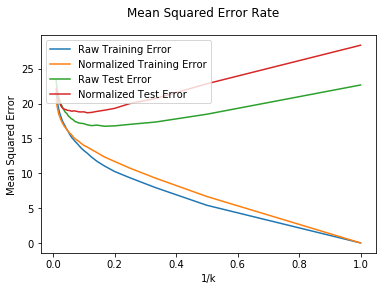

In [37]:
fig, ax = plt.subplots()
line1 = ax.plot(kInverseValues, trainRawErrors, label = "Raw Training Error")
line2 = ax.plot(kInverseValues, trainNormErrors, label = "Normalized Training Error")
line3 = ax.plot(kInverseValues, testRawErrors, label = "Raw Test Error")
line4 = ax.plot(kInverseValues, testNormErrors, label = "Normalized Test Error")
plt.legend(loc="upper left")
fig.suptitle('Mean Squared Error Rate', fontsize=12)
ax.set_xlabel('1/k', fontsize=10)
ax.set_ylabel('Mean Squared Error', fontsize='medium') 
ax.xaxis.label.set_size(10)
plt.draw()

(i) Can you improve your model using possible interaction terms or nonlinear associations between the predictors and response? Train the regression model on a randomly selected 70% subset of the data with all predictors. Also, run a regression model involving all possible interaction terms XiXj as well as quadratic nonlinearities Xi^2, and remove insignificant variables using p-values (be careful about interaction terms). Test both models on the remaining points and report your train and test MSEs. 

In [38]:
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size=0.30, random_state=40)
xMultLinTrain = sm.add_constant(xTrain, prepend=False)
slrMultLinTrain = sm.OLS(yTrain, xMultLinTrain).fit()
print(slrMultLinTrain.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                 2.209e+04
Date:                Fri, 26 Feb 2021   Prob (F-statistic):               0.00
Time:                        23:12:03   Log-Likelihood:                -19604.
No. Observations:                6697   AIC:                         3.922e+04
Df Residuals:                    6692   BIC:                         3.925e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AT            -1.9569      0.018   -106.806      0.0

C:\Users\yilei\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [39]:
# Calculating training MSE for multiple regression
slrMultLinTrainPred = slrMultLinTrain.predict(xMultLinTrain)
slrMultLinTrainError = mean_squared_error(slrMultLinTrainPred, yTrain)

In [40]:
# multiple linear regression on testing data 
xMultLinTest = sm.add_constant(xTest, prepend=False)
slrMultLinTest = sm.OLS(yTest, xMultLinTest).fit()
print(slrMultLinTest.summary())

C:\Users\yilei\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     9086.
Date:                Fri, 26 Feb 2021   Prob (F-statistic):               0.00
Time:                        23:12:03   Log-Likelihood:                -8477.1
No. Observations:                2871   AIC:                         1.696e+04
Df Residuals:                    2866   BIC:                         1.699e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AT            -2.0250      0.028    -72.994      0.0

In [41]:
# Calculating test MSE for multiple regression
slrMultLinTestPred = slrMultLinTest.predict(xMultLinTest)
slrMultLinTestError = mean_squared_error(slrMultLinTestPred, yTest)

In [42]:
# Interaction model on training data
xIntTrain = PolynomialFeatures(2, interaction_only=True, include_bias=False).fit_transform(xTrain)
int_train_df = pd.DataFrame(xIntTrain, columns = ['AT','V','AP','RH','AT:V','AT:AP','AT:RH','V:AP','V:RH','AP:RH'])
yNewTrain = yTrain.values.reshape(-1,1)
int_train_model = linear_model.OLS(yNewTrain, sm.add_constant(int_train_df)).fit()
print(int_train_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     9987.
Date:                Fri, 26 Feb 2021   Prob (F-statistic):               0.00
Time:                        23:12:03   Log-Likelihood:                -19217.
No. Observations:                6697   AIC:                         3.846e+04
Df Residuals:                    6686   BIC:                         3.853e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        715.4111     92.584      7.727      0.0

C:\Users\yilei\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [43]:
# Calculating train MSE for interaction
interactTrainPred = int_train_model.predict(sm.add_constant(int_train_df))
interactTrainError = mean_squared_error(interactTrainPred, yNewTrain)

In [44]:
# Interaction model on testing data 
xIntTest = PolynomialFeatures(2, interaction_only=True, include_bias=False).fit_transform(xTest)
int_test_df = pd.DataFrame(xIntTest, columns = ['AT','V','AP','RH','AT:V','AT:AP','AT:RH','V:AP','V:RH','AP:RH'])
yNewTest = yTest.values.reshape(-1,1)
int_test_model = linear_model.OLS(yNewTest, sm.add_constant(int_test_df)).fit()
print(int_test_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     4077.
Date:                Fri, 26 Feb 2021   Prob (F-statistic):               0.00
Time:                        23:12:03   Log-Likelihood:                -8320.7
No. Observations:                2871   AIC:                         1.666e+04
Df Residuals:                    2860   BIC:                         1.673e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        593.8100    148.887      3.988      0.0

C:\Users\yilei\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [45]:
# Calculating test MSE for interaction
interactTestPred = int_test_model.predict(sm.add_constant(int_test_df))
interactTestError = mean_squared_error(interactTestPred, yNewTest)

In [46]:
xNonLinTrain = PolynomialFeatures(degree=2).fit_transform(xTrain)
nonlin_train_model = sm.OLS(yTrain, xNonLinTrain).fit()
print(nonlin_train_model.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     7291.
Date:                Fri, 26 Feb 2021   Prob (F-statistic):               0.00
Time:                        23:12:04   Log-Likelihood:                -19147.
No. Observations:                6697   AIC:                         3.832e+04
Df Residuals:                    6682   BIC:                         3.843e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5954.2606   1432.135     -4.158      0.0

In [47]:
# Calculating train MSE for nonlinear 
nonLinTrainPred = nonlin_train_model.predict(xNonLinTrain)
nonLinTrainError = mean_squared_error(nonLinTrainPred, yTrain)

In [48]:
xNonLinTest = PolynomialFeatures(degree=2).fit_transform(xTest)
nonlin_test_model = sm.OLS(yTest, xNonLinTest).fit()
print(nonlin_test_model.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     3014.
Date:                Fri, 26 Feb 2021   Prob (F-statistic):               0.00
Time:                        23:12:04   Log-Likelihood:                -8272.9
No. Observations:                2871   AIC:                         1.658e+04
Df Residuals:                    2856   BIC:                         1.667e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.108e+04   2253.775     -4.917      0.0

In [49]:
# Calculating test MSE for nonlinear
nonLinTestPred = nonlin_train_model.predict(xNonLinTest)
nonLinTestError = mean_squared_error(nonLinTestPred, yTest)

In [50]:
print("The MSE for multiple regression training is " + str(slrMultLinTrainError) + ".")
print("The MSE for multiple regression testing is " + str(slrMultLinTestError) + ".")
print("The MSE for interaction training is " + str(interactTrainError) + ".")
print("The MSE for interaction testing is " + str(interactTestError) + ".")
print("The MSE for nonlinear training is " + str(nonLinTrainError) + ".")
print("The MSE for nonlinear testing is " + str(nonLinTestError) + ".")

The MSE for multiple regression training is 20.42276330249501.
The MSE for multiple regression testing is 21.48771418408967.
The MSE for interaction training is 18.19699891513253.
The MSE for interaction testing is 19.269129080362656.
The MSE for nonlinear training is 17.81837178891519.
The MSE for nonlinear testing is 18.82103815852445.


##### (j) Compare the results of KNN Regression with the linear regression model that has the smallest test error and provide your analysis. 

In [51]:
print("The MSE for training raw data in the KNN Regression is " + str(trainRawErrors[kBestFitTrainRaw]) + ".")
print("The MSE for testing raw data in the KNN Regression is " + str(testRawErrors[kBestFitTestRaw]) + ".")

The MSE for training raw data in the KNN Regression is 0.0.
The MSE for testing raw data in the KNN Regression is 16.739065959402456.


Compared to the MSE of the linear regression model above, the kNN reggression's MSE is lower. Therefore, kNN is a more accurate model.